In [1]:
import numpy as np
import zipfile


In [2]:
GLOVE_DIR = '../data/'
GLOVE_ZIP = GLOVE_DIR + 'glove6B50dtxt.zip'
print(GLOVE_ZIP)
 

zip_ref = zipfile.ZipFile(GLOVE_ZIP, 'r')
zip_ref.extractall(GLOVE_DIR)
zip_ref.close()


../data/glove.6B.50d.txt.zip


In [3]:
def load_glove_vectors(fn):
    print("Loading Glove Model")
    with open( fn,'r', encoding='utf8') as glove_vector_file:
        model = {}
        for line in glove_vector_file:
            parts = line.split()
            word = parts[0]
            embedding = np.array([float(val) for val in parts[1:]])
            model[word] = embedding
        print("Loaded {} words".format(len(model)))
    return model
 
glove_vectors = load_glove_vectors(GLOVE_DIR +'glove.6B.50d.txt')


Loading Glove Model
Loaded 400000 words


In [4]:
glove_vectors

{'toome': array([-0.59564  ,  0.059177 ,  0.17763  , -0.29224  , -0.41551  ,
        -0.26442  ,  1.005    ,  1.1229   , -0.26314  , -0.059619 ,
        -0.13074  , -0.6412   ,  0.73693  ,  0.1582   , -1.1326   ,
         0.52706  , -0.37271  , -0.52004  ,  1.0707   ,  0.34211  ,
        -0.51493  , -0.16794  , -0.68686  ,  0.2112   , -0.20336  ,
         0.74712  ,  0.0036526,  0.72806  , -0.71157  ,  0.6604   ,
        -0.99936  , -0.93085  ,  1.4436   ,  0.52974  ,  0.88481  ,
        -0.63161  , -0.07909  , -0.48706  ,  0.18439  , -0.73896  ,
        -0.88652  , -0.34052  ,  0.43542  ,  0.29617  , -0.41002  ,
        -0.41874  ,  0.78054  , -0.57239  ,  0.3287   , -0.49805  ]),
 '2.1-mile': array([-0.31253 ,  0.013781, -0.50098 , -0.14181 , -0.99016 , -1.3176  ,
         1.1396  ,  0.28936 , -0.08411 , -0.29754 , -0.83493 , -0.38797 ,
         0.66978 , -0.029615, -0.45121 , -0.28495 , -0.069342,  0.13203 ,
         0.059888,  0.57907 , -0.19308 , -0.12138 , -1.2647  ,  0.60119 ,
 

In [9]:
glove_vectors["dog"]

array([ 0.11008  , -0.38781  , -0.57615  , -0.27714  ,  0.70521  ,
        0.53994  , -1.0786   , -0.40146  ,  1.1504   , -0.5678   ,
        0.0038977,  0.52878  ,  0.64561  ,  0.47262  ,  0.48549  ,
       -0.18407  ,  0.1801   ,  0.91397  , -1.1979   , -0.5778   ,
       -0.37985  ,  0.33606  ,  0.772    ,  0.75555  ,  0.45506  ,
       -1.7671   , -1.0503   ,  0.42566  ,  0.41893  , -0.68327  ,
        1.5673   ,  0.27685  , -0.61708  ,  0.64638  , -0.076996 ,
        0.37118  ,  0.1308   , -0.45137  ,  0.25398  , -0.74392  ,
       -0.086199 ,  0.24068  , -0.64819  ,  0.83549  ,  1.2502   ,
       -0.51379  ,  0.04224  , -0.88118  ,  0.7158   ,  0.38519  ])

In [10]:
glove_vectors["cat"]

array([ 0.45281 , -0.50108 , -0.53714 , -0.015697,  0.22191 ,  0.54602 ,
       -0.67301 , -0.6891  ,  0.63493 , -0.19726 ,  0.33685 ,  0.7735  ,
        0.90094 ,  0.38488 ,  0.38367 ,  0.2657  , -0.08057 ,  0.61089 ,
       -1.2894  , -0.22313 , -0.61578 ,  0.21697 ,  0.35614 ,  0.44499 ,
        0.60885 , -1.1633  , -1.1579  ,  0.36118 ,  0.10466 , -0.78325 ,
        1.4352  ,  0.18629 , -0.26112 ,  0.83275 , -0.23123 ,  0.32481 ,
        0.14485 , -0.44552 ,  0.33497 , -0.95946 , -0.097479,  0.48138 ,
       -0.43352 ,  0.69455 ,  0.91043 , -0.28173 ,  0.41637 , -1.2609  ,
        0.71278 ,  0.23782 ])

### the below method is just for test case and is not in exercise

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
 
def to_vector(glove_vectors, word):
    vector = glove_vectors.get(word.lower())
    if vector is None:
        vector = [0] * 50
    return vector 
 
def to_image(vector, word=''):
    fig, ax = plt.subplots(1,1)
    ax.tick_params(axis='both', which='both',
                   left=False, 
                   bottom=False, 
                   top=False,
                   labelleft=False,
                   labelbottom=False)
    ax.grid(False)
    ax.bar(range(len(vector)), vector, 0.5)
    ax.text(s=word, x=1, y=vector.max()+0.5)
    return vector


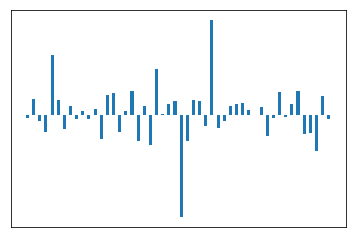

In [12]:
man = to_image(to_vector(glove_vectors, "man"))

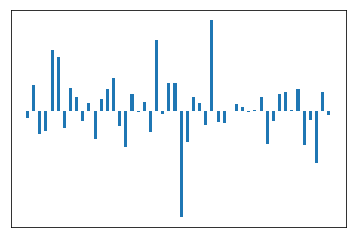

In [13]:
woman = to_image(to_vector(glove_vectors, "woman"))

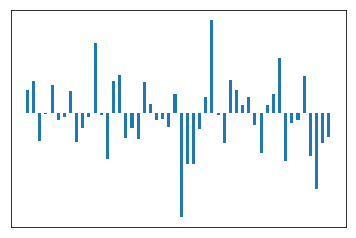

In [14]:
king = to_image(to_vector(glove_vectors, "king"))


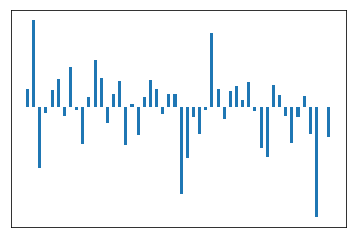

In [15]:
queen = to_image(to_vector(glove_vectors, "queen"))

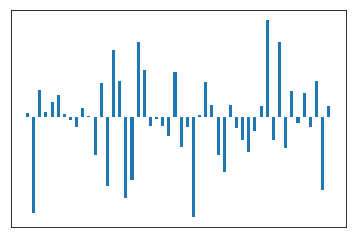

In [16]:
diff = to_image(king - man + woman - queen)

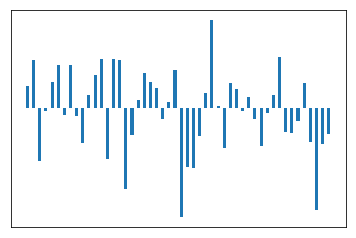

In [17]:
nd = to_image(king - man + woman)